# Naive Bayes implementation

A simple implementation of naive bayes for predicting if mushrooms are edible or poisonous

## Problem description

**Goal**: Predict if mushroom is poisonous

# Setup

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

set_config(transform_output='pandas')

# Exploratory Analysis

In [2]:
raw = pd.read_csv("data/data.csv")
raw

,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE.1,...,SMOOTH.2,WHITE.2,WHITE.3,PARTIAL,WHITE.4,ONE,PENDANT,PURPLE,SEVERAL,WOODS
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8415 entries, 0 to 8414
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EDIBLE    8415 non-null   object
 1   CONVEX    8415 non-null   object
 2   SMOOTH    8415 non-null   object
 3   WHITE     8415 non-null   object
 4   BRUISES   8415 non-null   object
 5   ALMOND    8415 non-null   object
 6   FREE      8415 non-null   object
 7   CROWDED   8415 non-null   object
 8   NARROW    8415 non-null   object
 9   WHITE.1   8415 non-null   object
 10  TAPERING  8415 non-null   object
 11  BULBOUS   8415 non-null   object
 12  SMOOTH.1  8415 non-null   object
 13  SMOOTH.2  8415 non-null   object
 14  WHITE.2   8415 non-null   object
 15  WHITE.3   8415 non-null   object
 16  PARTIAL   8415 non-null   object
 17  WHITE.4   8415 non-null   object
 18  ONE       8415 non-null   object
 19  PENDANT   8415 non-null   object
 20  PURPLE    8415 non-null   object
 21  SEVERAL   8415

In [10]:
raw.EDIBLE.unique()

array(['EDIBLE', 'POISONOUS'], dtype=object)

## Pre-Processing

### Handle missing values and categorical data

In [ ]:
# split the data info features and target column
X_raw = raw.drop('EDIBLE', axis=1)
Y_raw = raw.EDIBLE

# all columns are categorical, so One Hot Encoding it's a good choice
enc = OneHotEncoder(sparse_output=False)
X = enc.fit_transform(X_raw)

# for target column use label encoder
le = LabelEncoder()
y = le.fit_transform(Y_raw)

## Prepare test and train data

In [20]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, shuffle=True)

# Train the model

In [22]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


## Test and Plot Results

In [25]:
# get predictions for test set
predictions = model.predict(X_test)

# Score (R²)
accuracy = model.score(X_test, y_test)
accuracy

0.964349376114082

### Confusion Matrix
Displays how many results were predicted correctly

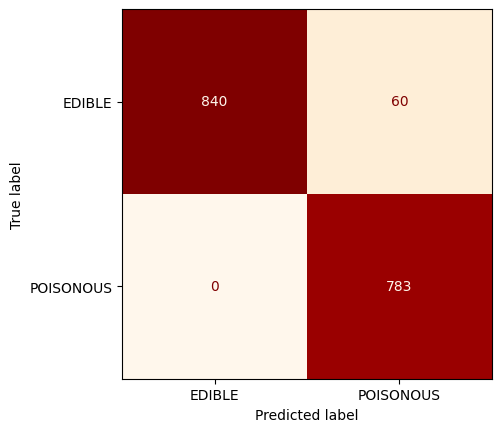

In [37]:
real_labels = le.inverse_transform([0, 1])

# Plot confusion matrix with correct labels
ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    display_labels=real_labels,
    cmap='OrRd',
    colorbar=False
)